In [1]:
#import libraries to use
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
#read csv file data
data = pd.read_csv('matches.csv')

In [4]:
data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [5]:
data.shape

(756, 18)

In [6]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
#Some important information for the data set
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [8]:
#Some important information for the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [10]:
data.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [11]:
data_prepared=data.drop('umpire3', axis = 1)

In [21]:
data_prepared

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [68]:
matchesandseason=data_prepared.groupby('season').id.count()

[Text(0.5, 0, 'Seasons'), Text(0, 0.5, 'Number of Matches')]

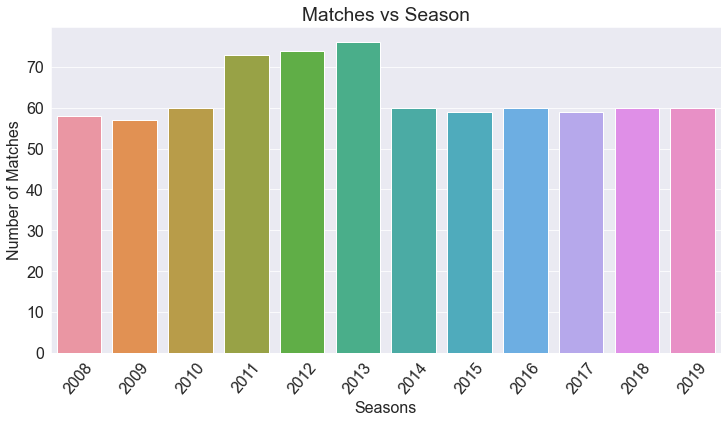

In [101]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=50)
plt.title('Matches vs Season')
matchandseason_plot = sns.barplot(x = matchesandseason.index, y = matchesandseason)
matchandseason_plot.set(xlabel = 'Seasons', ylabel = 'Number of Matches')

In [70]:
matchesandcity=data_prepared.groupby('city').id.count()

[Text(0.5, 0, 'City'), Text(0, 0.5, 'Number of Matches')]

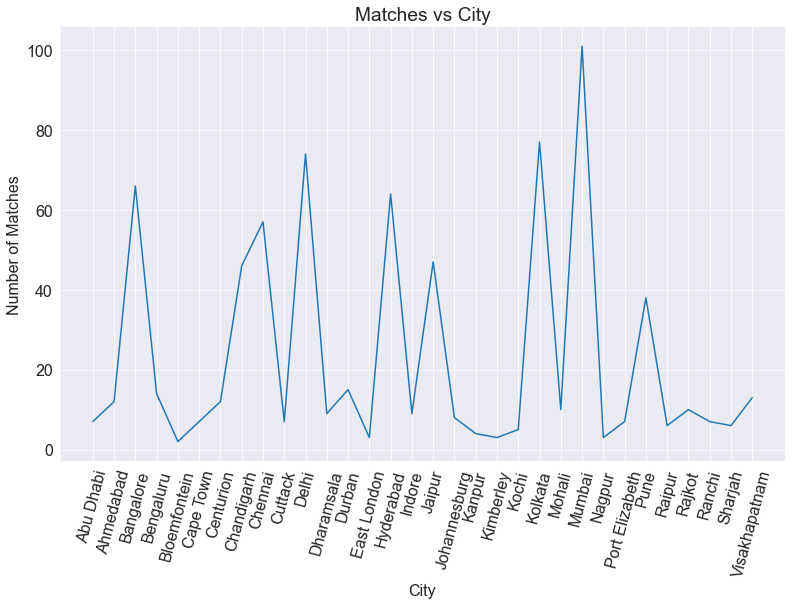

In [102]:
plt.figure(figsize=(13,8))
plt.xticks(rotation=75)
plt.title('Matches vs City')
matchandcity_plot = sns.lineplot(x = matchesandcity.index, y = matchesandcity)
matchandcity_plot.set(xlabel = 'City', ylabel = 'Number of Matches')

In [38]:
#toss_decision değerleri için yüzde hesaplama
toss_decision_percentage = data_prepared.groupby('season').toss_decision.value_counts().sort_index() / matchesandseason * 100

In [39]:
#view percentage values for toss_decision_percentage
toss_decision_percentage

season  toss_decision
2008    bat              44.827586
        field            55.172414
2009    bat              61.403509
        field            38.596491
2010    bat              65.000000
        field            35.000000
2011    bat              34.246575
        field            65.753425
2012    bat              50.000000
        field            50.000000
2013    bat              59.210526
        field            40.789474
2014    bat              31.666667
        field            68.333333
2015    bat              42.372881
        field            57.627119
2016    bat              18.333333
        field            81.666667
2017    bat              18.644068
        field            81.355932
2018    bat              16.666667
        field            83.333333
2019    bat              16.666667
        field            83.333333
dtype: float64

In [40]:
toss_decision_percentage.unstack() #bat ve field değerlerini ayrı ayrı kolonlara bölmek

toss_decision,bat,field
season,,
2008,44.827586,55.172414
2009,61.403509,38.596491
2010,65.000000,35.000000
2011,34.246575,65.753425
2012,50.000000,50.000000
2013,59.210526,40.789474
2014,31.666667,68.333333
2015,42.372881,57.627119
2016,18.333333,81.666667


<AxesSubplot:title={'center':'Toss Decisions'}, xlabel='Seasons', ylabel='Percentage'>

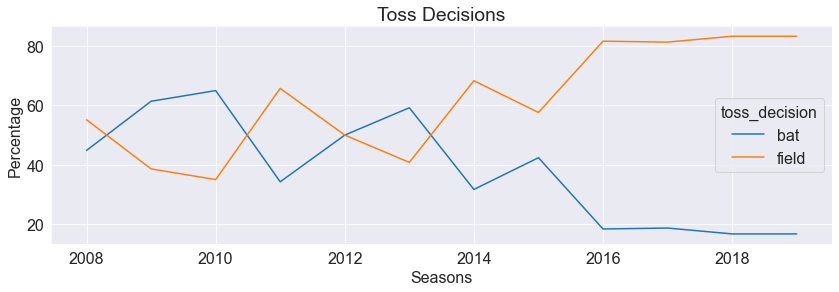

In [100]:
toss_decision_percentage.unstack().plot(kind = 'line', figsize=(14,4), title = 'Toss Decisions', xlabel = 'Seasons', ylabel = 'Percentage')

<AxesSubplot:title={'center':'Toss Decisions'}, xlabel='Seasons', ylabel='Percentage'>

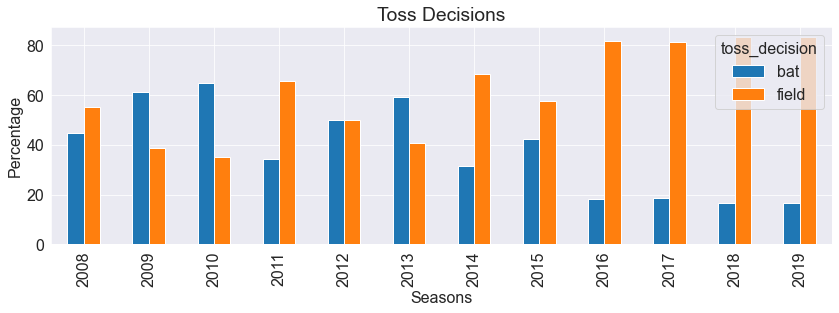

In [99]:
toss_decision_percentage.unstack().plot(kind = 'bar', figsize=(14,4), title = 'Toss Decisions', xlabel = 'Seasons', ylabel = 'Percentage')

In [56]:
data_prepared

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [57]:
filter1 = (data_prepared.win_by_wickets == 0) & (data_prepared.result == 'normal') 

In [58]:
wins_batting_first = data_prepared[filter1].groupby('season').winner.count() / matchesandseason * 100

In [59]:
filter2 = (data_prepared.win_by_runs == 0) & (data_prepared.result == 'normal')

In [60]:
wins_fielding_first = data_prepared[filter2].groupby('season').winner.count() / matchesandseason * 100

In [61]:
# create wins_data dataframe for batting_first and fielding first
wins_data = pd.concat([wins_batting_first, wins_fielding_first], axis = 1)
wins_data.columns = ['batting_first', 'fielding_first']
wins_data

,batting_first,fielding_first
season,,
2008,41.379310,58.620690
2009,47.368421,50.877193
2010,51.666667,46.666667
2011,45.205479,53.424658
2012,45.945946,54.054054
2013,48.684211,48.684211
2014,36.666667,61.666667
2015,54.237288,40.677966
2016,35.000000,65.000000


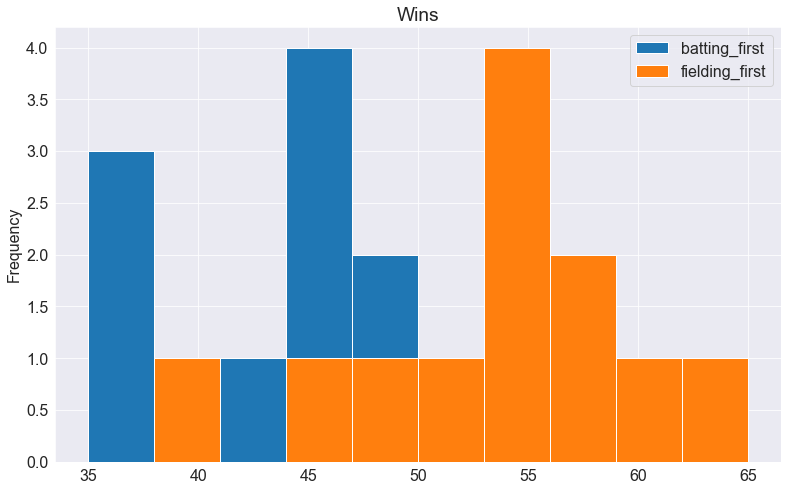

In [79]:
wins_data.plot(kind = 'hist', figsize=(13,8), title = 'Wins', xlabel = 'Seasons', ylabel = 'Percentage')

<AxesSubplot:title={'center':'Wins'}, xlabel='Seasons', ylabel='Percentage'>

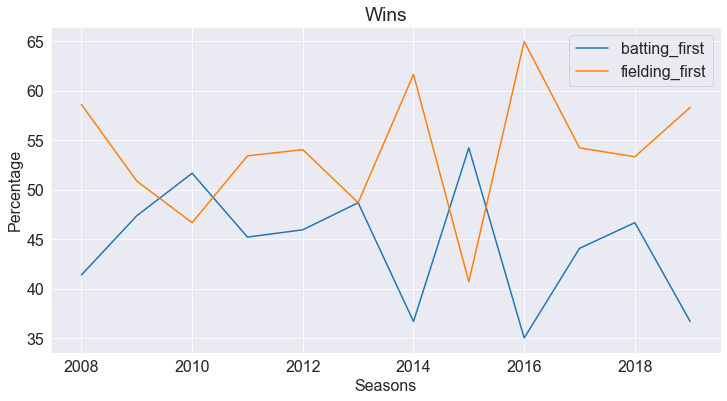

In [98]:
wins_data.plot(kind = 'line', figsize=(12,6), title = 'Wins', xlabel = 'Seasons', ylabel = 'Percentage')

In [83]:
#Toplam oynanan maçlar
total_matches_played = (data_prepared.team1.value_counts() + data_prepared.team2.value_counts()).sort_values(ascending = False)
total_matches_played

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiant          16
Delhi Capitals                  16
Rising Pune Supergiants         14
Kochi Tuskers Kerala            14
dtype: int64

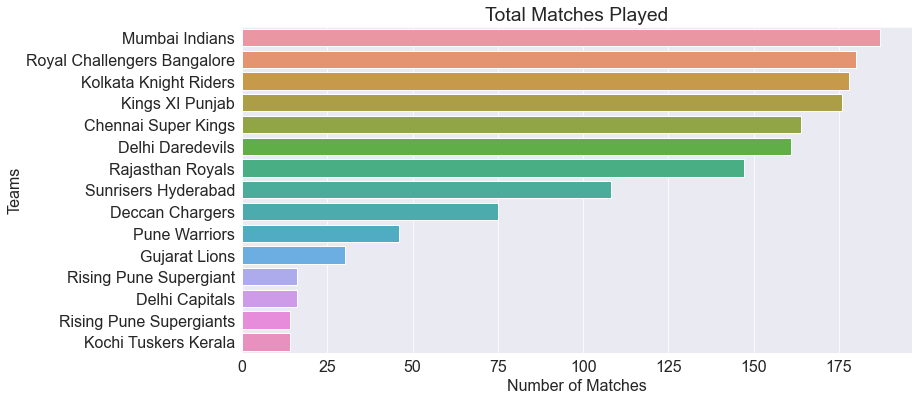

In [97]:
plt.figure(figsize=(12,6))
plt.title('Total Matches Played')
total_matches_played_plot = sns.barplot(y = total_matches_played.index, x = total_matches_played)
total_matches_played_plot.set(ylabel = 'Teams', xlabel = 'Number of Matches');

In [85]:
most_wins = data_prepared.winner.value_counts()

In [86]:
#En çok galibiyet alan takımlar
most_wins

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [87]:
#Galibiyet yüzdesi hesaplama
win_percentage = (most_wins / total_matches_played).sort_values(ascending = False) * 100 
win_percentage

Rising Pune Supergiant         62.500000
Delhi Capitals                 62.500000
Chennai Super Kings            60.975610
Mumbai Indians                 58.288770
Sunrisers Hyderabad            53.703704
Kolkata Knight Riders          51.685393
Rajasthan Royals               51.020408
Royal Challengers Bangalore    46.666667
Kings XI Punjab                46.590909
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               41.614907
Deccan Chargers                38.666667
Rising Pune Supergiants        35.714286
Pune Warriors                  26.086957
dtype: float64

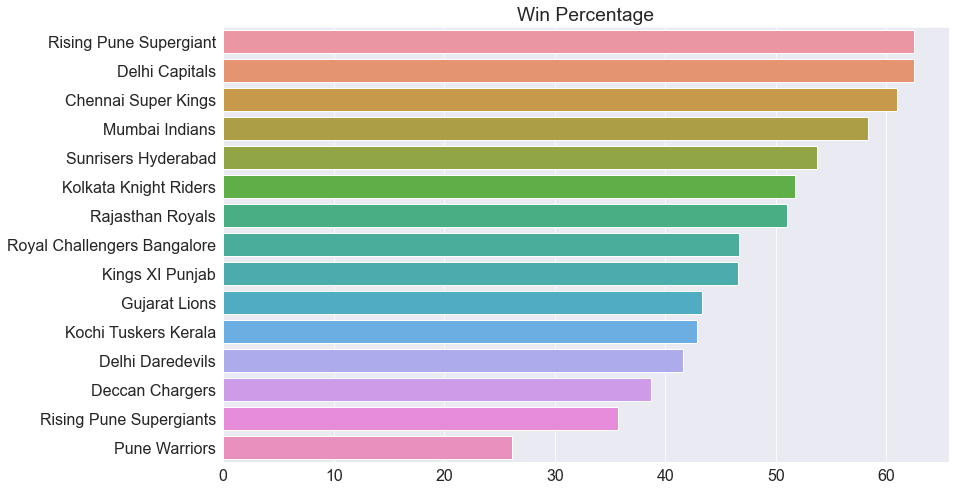

In [88]:
plt.figure(figsize=(13,8))
plt.title('Win Percentage')
win_percentage_plot = sns.barplot(y = win_percentage.index, x = win_percentage)
total_matches_played_plot.set(ylabel = 'Teams', xlabel = 'Percentage');

In [89]:
#Who has won the IPL tournament?
ipl_win = data_prepared.groupby('season').tail(1).sort_values('season', ascending = True)
ipl_win

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen
173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel
380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel
456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel
516,517,2014,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi


In [90]:
ipl_winners = ipl_win.winner.value_counts()
ipl_winners

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Sunrisers Hyderabad      1
Deccan Chargers          1
Name: winner, dtype: int64

<AxesSubplot:title={'center':'IPL Champions'}, xlabel='Teams', ylabel='winner'>

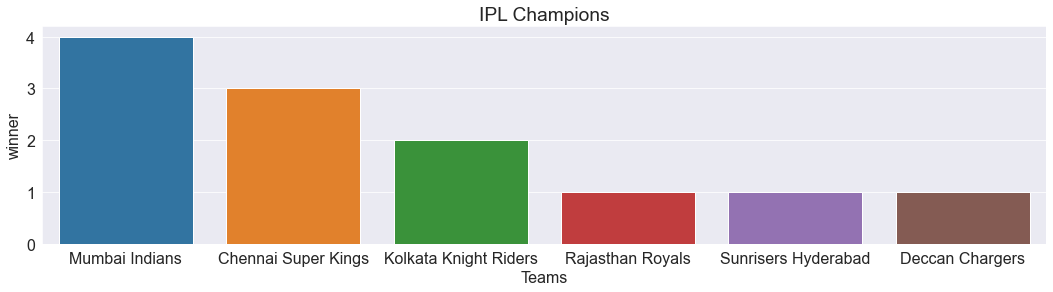

In [105]:
plt.figure(figsize=(18, 4))
plt.xlabel('Teams')
plt.ylabel('Number of Times')
plt.title('IPL Champions')
sns.barplot( x  = ipl_winners.index, y = ipl_winners)

In [107]:
#Which are the most and least consistent teams across all seasons?
matches_won_each_season = pd.crosstab(data_prepared['winner'], data_prepared['season'])
matches_won_each_season

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
winner,,,,,,,,,,,,
Chennai Super Kings,9,8,9,11,10,12,10,10,0,0,11,10
Deccan Chargers,2,9,8,6,4,0,0,0,0,0,0,0
Delhi Capitals,0,0,0,0,0,0,0,0,0,0,0,10
Delhi Daredevils,7,10,7,4,11,3,2,5,7,6,5,0
Gujarat Lions,0,0,0,0,0,0,0,0,9,4,0,0
Kings XI Punjab,10,7,4,7,8,8,12,3,4,7,6,6
Kochi Tuskers Kerala,0,0,0,6,0,0,0,0,0,0,0,0
Kolkata Knight Riders,6,3,7,8,12,6,11,7,8,9,9,6
Mumbai Indians,7,5,11,10,10,13,7,10,7,12,6,11


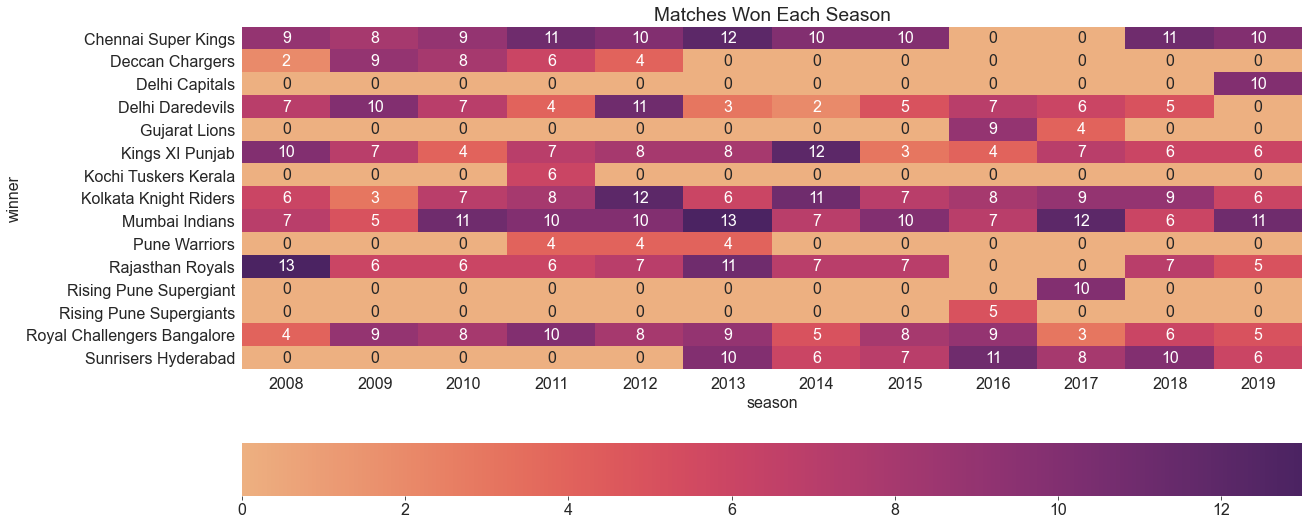

In [108]:
plt.figure(figsize=(19, 9))
plt.xlabel('Seasons')
plt.ylabel('Teams')
plt.title('Matches Won Each Season')
sns.heatmap(matches_won_each_season, annot = True, cmap = 'flare', fmt = 'd', cbar_kws={"orientation": "horizontal"});

In [109]:
#What has been the biggest margin of victory in terms of runs in the IPL?
highest_wins_by_runs_df = data[data.win_by_runs != 0].sort_values('win_by_runs', ascending = False)
highest_wins_by_runs_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
619,620,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,NaN
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
556,557,2015,Bangalore,2015-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni,NaN
410,411,2013,Bangalore,2013-04-23,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN
614,615,2016,Chandigarh,2016-05-09,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,1,0,SR Watson,"Punjab Cricket Association IS Bindra Stadium, ...",AK Chaudhary,HDPK Dharmasena,NaN
598,599,2016,Delhi,2016-04-27,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,field,normal,0,Gujarat Lions,1,0,CH Morris,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
163,164,2009,Johannesburg,2009-05-17,Kings XI Punjab,Deccan Chargers,Deccan Chargers,field,normal,0,Kings XI Punjab,1,0,Yuvraj Singh,New Wanderers Stadium,S Ravi,RB Tiffin,NaN


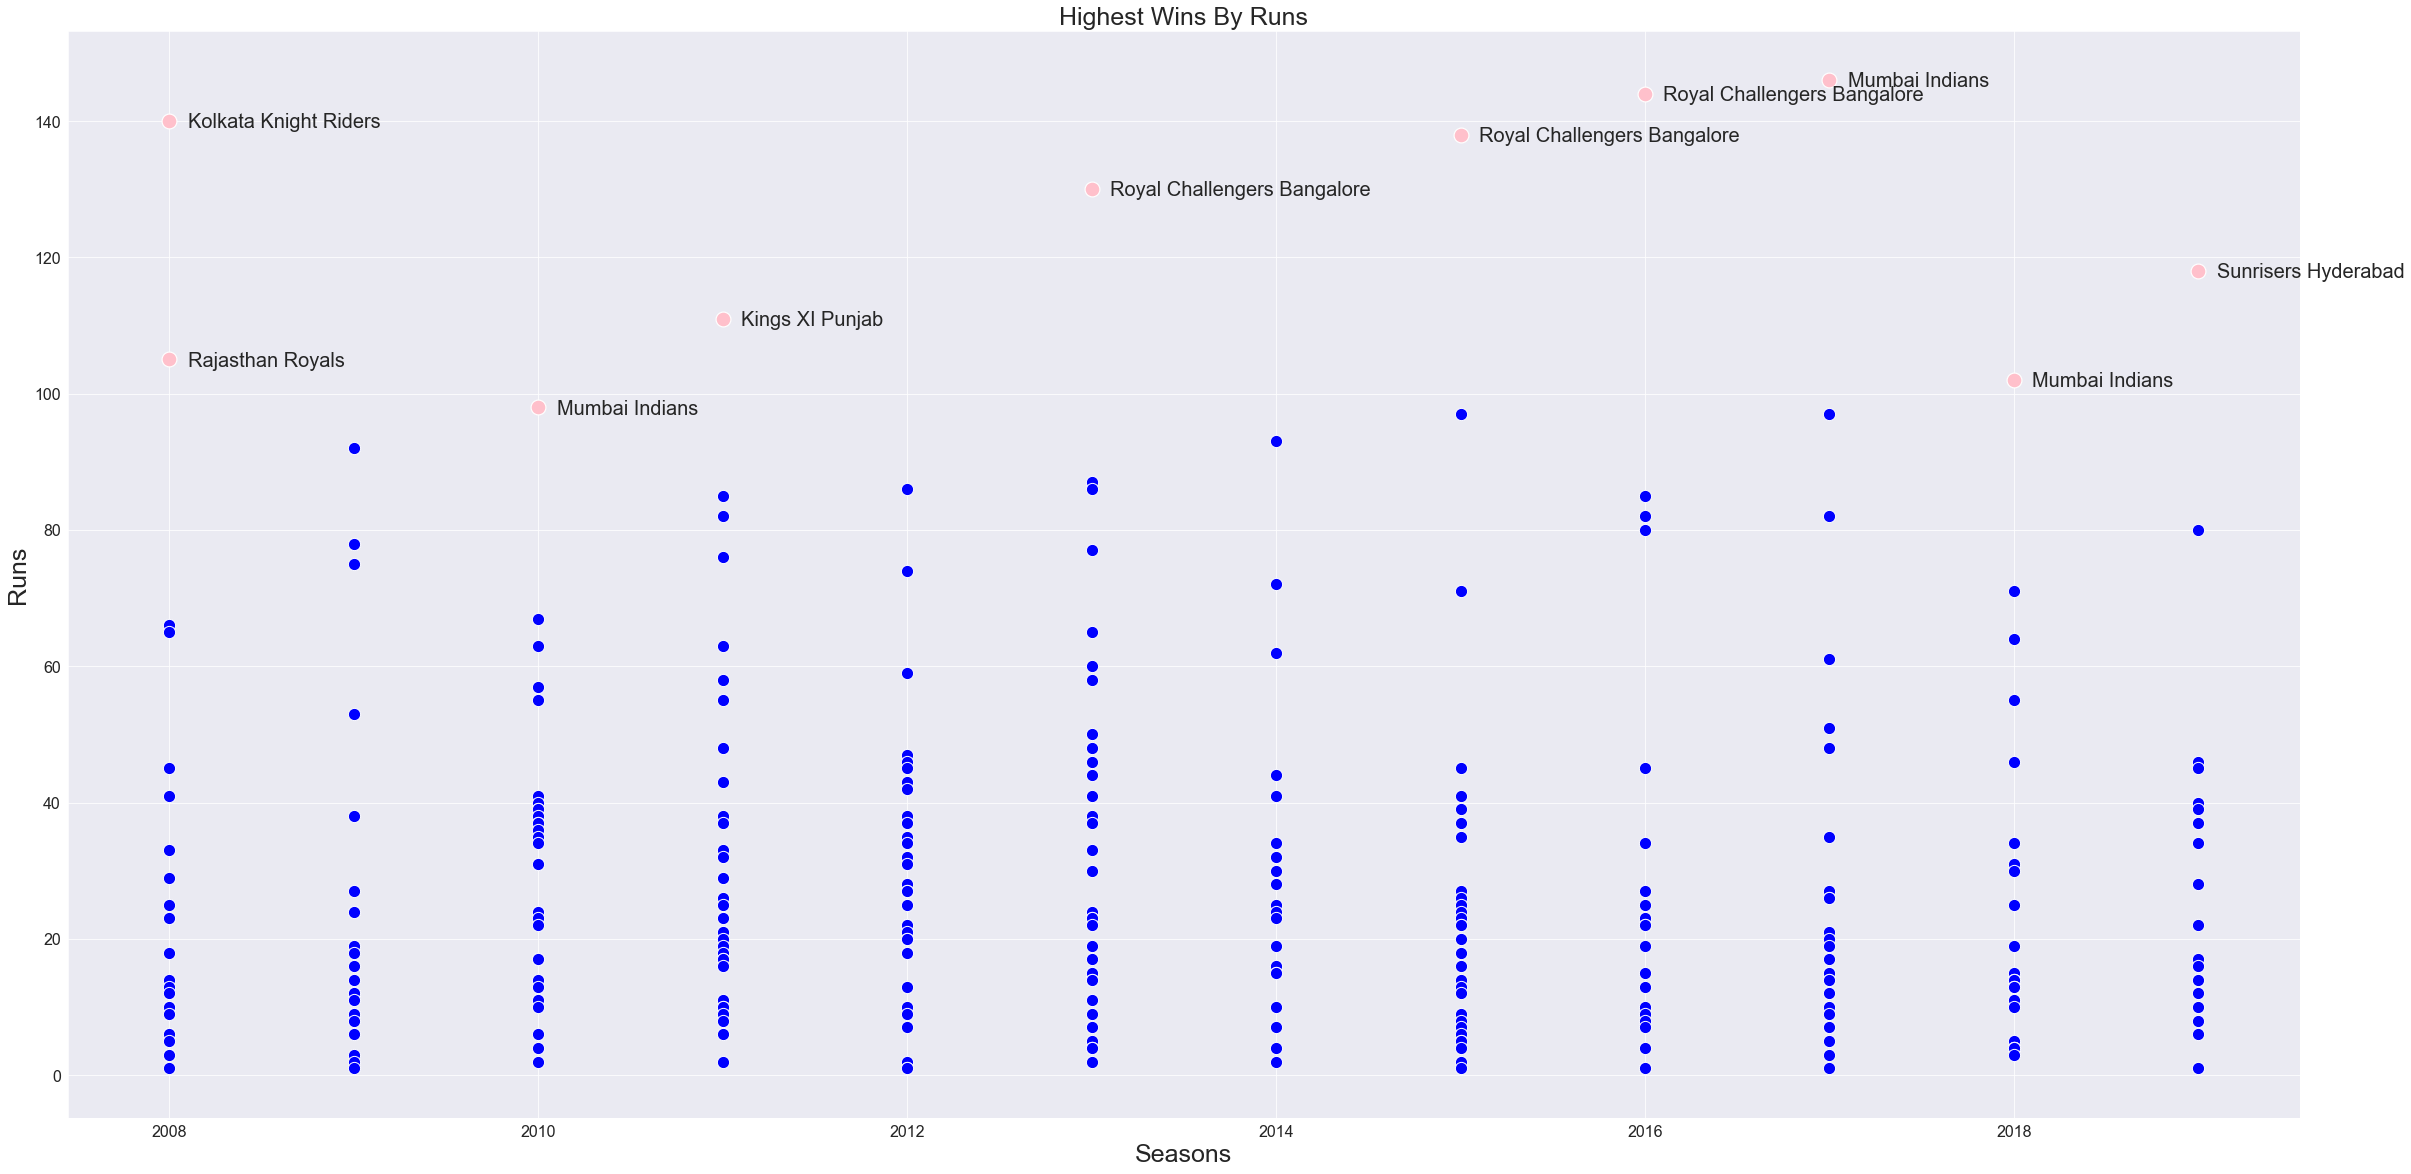

In [117]:
plt.figure(figsize=(40, 20))
plt.xlabel('Seasons',size=25)
plt.ylabel('Runs',size=25)
plt.title('Highest Wins By Runs', size = 25)
sns.scatterplot(x = 'season',y =  'win_by_runs', data = highest_wins_by_runs_df, s =150, color = 'blue');
sns.scatterplot(x = 'season',y =  'win_by_runs', data = highest_wins_by_runs_df.head(10), s =220, color = 'pink');
for i in range(highest_wins_by_runs_df.head(10).shape[0]):
    plt.annotate(highest_wins_by_runs_df.winner.tolist()[i], (highest_wins_by_runs_df.season.tolist()[i]+0.1, highest_wins_by_runs_df.win_by_runs.tolist()[i] - 1) , size = 20)

In [118]:
#Mumbai and Chennai are the two most successful teams so far. Which team leads in the head-to-head record?
data_example = data_prepared[((data_prepared.team1 == 'Mumbai Indians') & (data_prepared.team2 == 'Chennai Super Kings')) | ((data_prepared.team1 == 'Chennai Super Kings') & (data_prepared.team2 == 'Mumbai Indians')) ]

In [119]:
dt=data_example.winner.value_counts()
dt

Mumbai Indians         17
Chennai Super Kings    11
Name: winner, dtype: int64

[Text(0.5, 0, 'Teams'), Text(0, 0.5, 'Matches Won')]

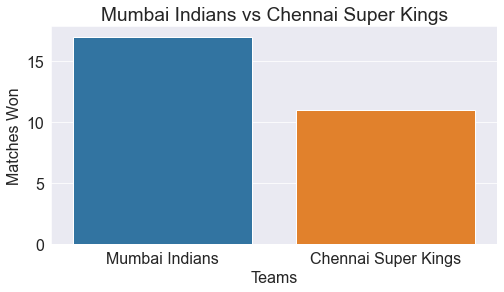

In [123]:
plt.figure(figsize=(8,4))
plt.title('Mumbai Indians vs Chennai Super Kings')
dt_plot = sns.barplot(x = dt.index, y = dt);
dt_plot.set(xlabel = 'Teams', ylabel = 'Matches Won')